In [1]:
import pandas as pd

In [2]:
A = pd.read_csv("C:/Users/Gayatri/Downloads/Cars93.csv")

In [3]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
B = A[["Price","MPG.city"]]

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
trres = km.fit(B)

In [6]:
trres.labels_

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0])

In [7]:
len(trres.labels_)

93

In [8]:
B.shape

(93, 2)

In [9]:
B.head(4)

,Price,MPG.city
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19


In [10]:
B['Car_model']=A.Model

<ipython-input-10-723af5f362fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['Car_model']=A.Model


In [20]:
B.head(4)

,Price,MPG.city,Car_model
0,15.9,25,Integra
1,33.9,18,Legend
2,29.1,20,90
3,37.7,19,100


In [13]:
B.sort_values(by="cluster_cartype")

KeyError: 'cluster_cartype'

In [21]:
B['cluster_cartype'] = trres.labels_

<ipython-input-21-79e1bfbeb945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['cluster_cartype'] = trres.labels_


Text(0, 0.5, 'Mileage')

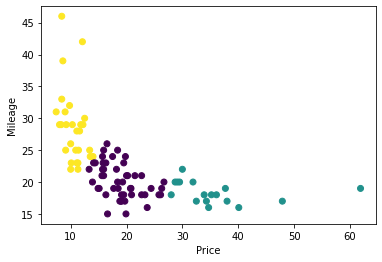

In [22]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.cluster_cartype)
plt.xlabel("Price")
plt.ylabel("Mileage")

In [23]:
q = {0:"red",1:"blue",2:"black"}

In [24]:
col=[]
for i in B.cluster_cartype:
    col.append(q[i])

In [25]:
col

['red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'black',
 'black',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'black',
 'black',
 'red',
 'red',
 'red',
 'red',
 'black',
 'red',
 'black',
 'black',
 'black',
 'red',
 'black',
 'red',
 'red',
 'red',
 'black',
 'black',
 'red',
 'black',
 'red',
 'black',
 'black',
 'black',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'black',
 'black',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'black',
 'red',
 'black',
 'red',
 'red',
 'red',
 'black',
 'red',
 'red',
 'red',
 'red',
 'black',
 'black',
 'red',
 'red',
 'red',
 'blue',
 'black',
 'black',
 'black',
 'red',
 'black',
 'black',
 'red',
 'red',
 'red',
 'black',
 'red',
 'red',
 'red',
 'red',
 'red']

In [26]:
B['color']=col

<ipython-input-26-3e55e527f280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['color']=col


Text(0, 0.5, 'Mileage')

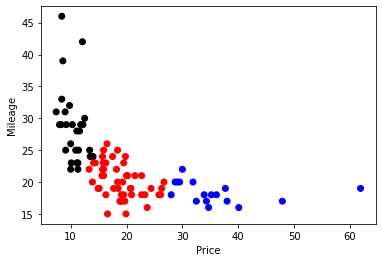

In [27]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=B.color)
plt.xlabel("Price")
plt.ylabel("Mileage")